In [1]:
from main import file_locate
from ml_models import logistic_regression
from ml_models import naive_bayes
from mlmodels import k_nearest
from mlmodels import support_vector
from mlmodels import gradient_boost
from mlmodels import random_forest
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
def analysis(labels_test, labels_pred):
    cm = confusion_matrix(labels_test, labels_pred)
    print(cm)
    accuracy = accuracy_score(labels_test, labels_pred)
    print("Accuracy: ", accuracy)
    report = classification_report(labels_test, labels_pred)
    print("Classification Report:")
    print(report)

In [3]:
def auc(labels_test, labels_pred):
    fpr, tpr, thresholds = roc_curve(labels_test, labels_pred)
    auc = roc_auc_score(labels_test, labels_pred)

    plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

In [4]:
file_locate('ml-analysis.ipynb')
filename = 'cleaned-framingham.csv'

Logistic Regression
[[1730  749]
 [ 974 1508]]
Accuracy:  0.6526909897198145
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.70      0.67      2479
           1       0.67      0.61      0.64      2482

    accuracy                           0.65      4961
   macro avg       0.65      0.65      0.65      4961
weighted avg       0.65      0.65      0.65      4961

[[442 180]
 [245 374]]
Accuracy:  0.6575342465753424
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.71      0.68       622
           1       0.68      0.60      0.64       619

    accuracy                           0.66      1241
   macro avg       0.66      0.66      0.66      1241
weighted avg       0.66      0.66      0.66      1241



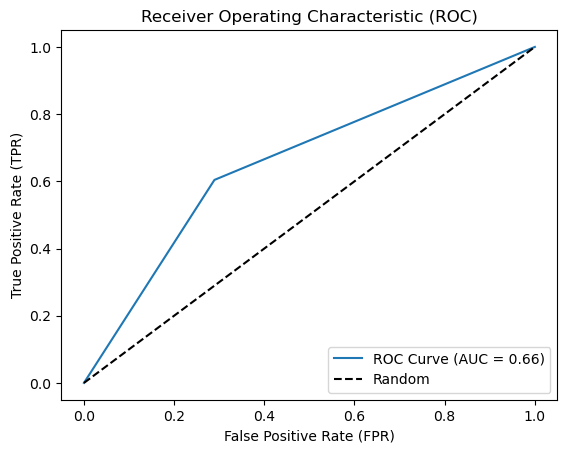

In [5]:
labels_train, labels_train_pred, labels_test, labels_pred = logistic_regression.logistic_regression(filename)
analysis(labels_train, labels_train_pred)
analysis(labels_test, labels_pred)
auc(labels_test, labels_pred)

Naive Bayes:
Best alpha 0.1
Best f1: 0.11199999999999999
Best threshold 0.1
Test f1 0.3082437275985663
[[1762  717]
 [1172 1310]]
Accuracy:  0.6192299939528321
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.71      0.65      2479
           1       0.65      0.53      0.58      2482

    accuracy                           0.62      4961
   macro avg       0.62      0.62      0.62      4961
weighted avg       0.62      0.62      0.62      4961

[[444 178]
 [295 324]]
Accuracy:  0.6188557614826753
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.71      0.65       622
           1       0.65      0.52      0.58       619

    accuracy                           0.62      1241
   macro avg       0.62      0.62      0.62      1241
weighted avg       0.62      0.62      0.62      1241



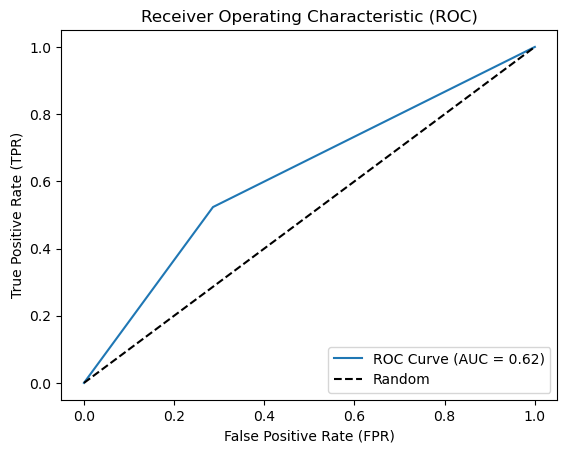

In [6]:
labels_train, labels_train_pred, labels_test, labels_pred = naive_bayes.naive_bayes(filename)
naive_bayes.find_alpha(filename)
naive_bayes.find_threshold(filename)
analysis(labels_train, labels_train_pred)
analysis(labels_test, labels_pred)
auc(labels_test, labels_pred)

In [7]:
k_nearest(filename)

K-Nearest Neighbors:
[[590  31]
 [ 93  18]]
Accuracy:  0.8306010928961749
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       621
           1       0.37      0.16      0.22       111

    accuracy                           0.83       732
   macro avg       0.62      0.56      0.56       732
weighted avg       0.79      0.83      0.80       732



In [8]:
gradient_boost(filename)

XGBoost: 
[[586  35]
 [ 98  13]]
Accuracy:  0.8183060109289617
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       621
           1       0.27      0.12      0.16       111

    accuracy                           0.82       732
   macro avg       0.56      0.53      0.53       732
weighted avg       0.77      0.82      0.79       732



In [9]:
random_forest(filename)

Random Forest
[[611  10]
 [103   8]]
Accuracy:  0.8456284153005464
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       621
           1       0.44      0.07      0.12       111

    accuracy                           0.85       732
   macro avg       0.65      0.53      0.52       732
weighted avg       0.79      0.85      0.80       732

